# Interaction 1: Interactive dataset for isobar plotting
In this example, a plot is shown with H2O vs CO2 contents of multiple samples from one dataset. We here use the dataset of melt inclusions from Cerro Negro volcano in Nicaragua from Roggensack (2001). The user would be able to click on any data point to display the corresponding isobars for 500, 1000, 2000, 3000, and 4000 bars. The user could toggle the set of isobars for any datapoint by clicking that point on the figure. This is modeled after Figure 11 in VESIcal (Iacovino et al., 2021).

### The original Figure 11 from the manuscript is shown below for reference:

![Figure 11](Figure11.png)

In [1]:
import VESIcal as v
import pickle

/opt/anaconda3/lib/python3.9/site-packages/numdifftools/extrapolation.py:10: DeprecationWarning: Please use `convolve1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve1d
/opt/anaconda3/lib/python3.9/site-packages/numdifftools/multicomplex.py:35: DeprecationWarning: `finfo.machar` is deprecated (NumPy 1.22)
  _TINY = np.finfo(float).machar.tiny


In [2]:
myfile = v.BatchFile('cerro_negro.xlsx')

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Calculate the isobars and pickle
I'll comment this out once I have run it once and save to a pickle file. Uncomment if you want to run locally.

**Uncomment the below to redo the calculation, else use the pickle file loaded in next cell**

In [3]:
# # Calculate isobars for all samples at 500, 1000, 2000, 3000, and 4000 bars (this will take  while to run...)
# isobar_list = []
# isopleth_list = []
# for index, row in myfile.get_data().iterrows():
#     print(row.name)
#     isobars, isopleths = v.calculate_isobars_and_isopleths(sample=myfile.get_sample_composition(samplename=row.name, asSampleClass=True),
#                                                          temperature=1200,
#                                                          pressure_list=[500, 1000, 2000, 3000, 4000],
#                                                          print_status=True).result
#     isobar_list.append(isobars)
#     isopleth_list.append(isopleths) # save this in case  we decide to use it later, since it's calculated anyways


# with open('Interaction1_isobars.pickle', 'wb') as handle:
#     pickle.dump(isobar_list, handle)

# with open('Interaction1_isopleths.pickle', 'wb') as handle:
#     pickle.dump(isopleth_list, handle)

In [4]:
# load data from pickled file

file = open('Interaction1_isobars.pickle', 'rb')
isobar_list = pickle.load(file)

In [5]:
# add sample names for easier referencing
sample_names = [row.name for index, row in myfile.get_data().iterrows()]

isobar_dict = {}
for count, value in enumerate(isobar_list):
    isobar_dict[sample_names[count]] = value

## Plot it

### Just the data points

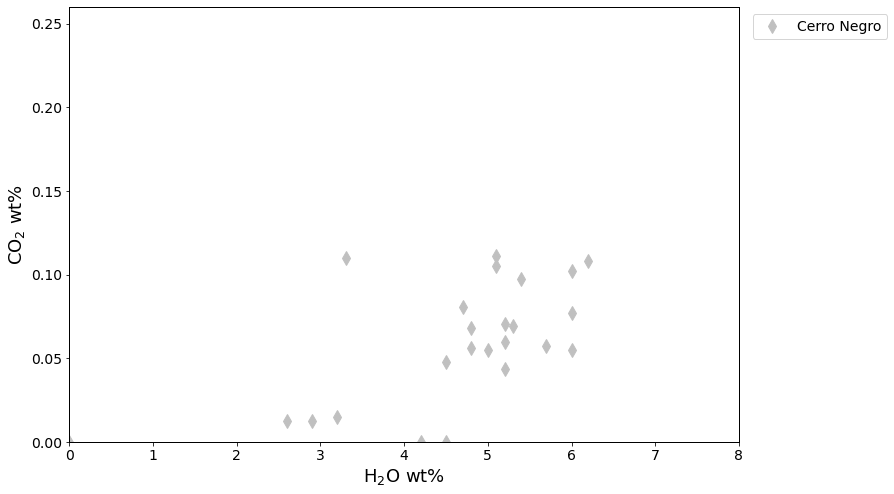

In [6]:
# import some data into a pandas dataframe
myfile = v.BatchFile("cerro_negro.xlsx")

# plot the individual datapoints
fig, ax = v.plot(custom_H2O=[myfile.get_data()["H2O"]],
       custom_CO2=[myfile.get_data()["CO2"]],
       custom_colors=['silver'],
       custom_symbols=['d'],
       custom_labels=['Cerro Negro'])
ax.set_xlim(0,8)
ax.set_ylim(0,0.26)
v.show()


### Any isobar from the list

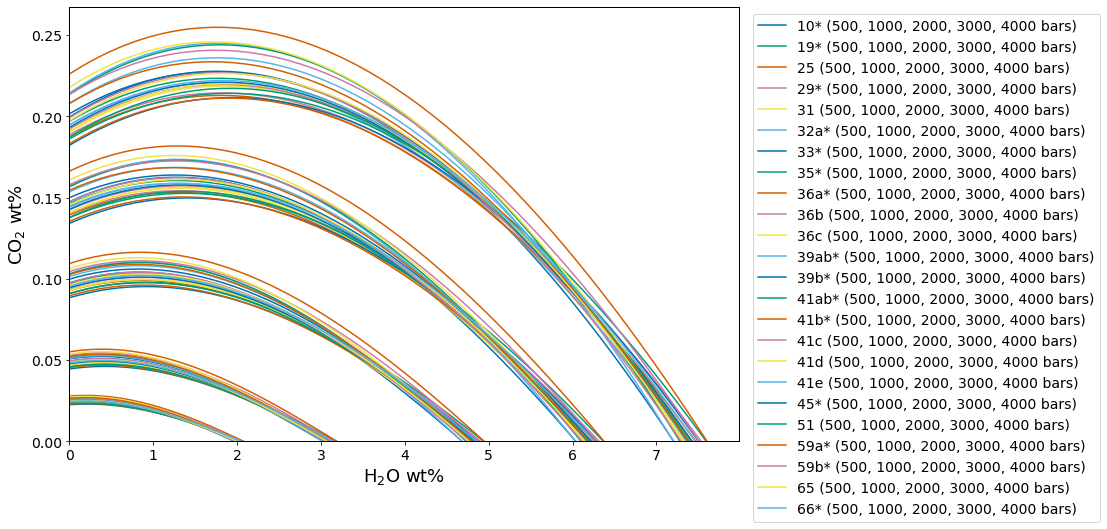

In [7]:
#Plot all isobars from dataset
fig, ax = v.plot(isobars=[isobar for isobar in isobar_dict.values()], isobar_labels=sample_names)
v.show()

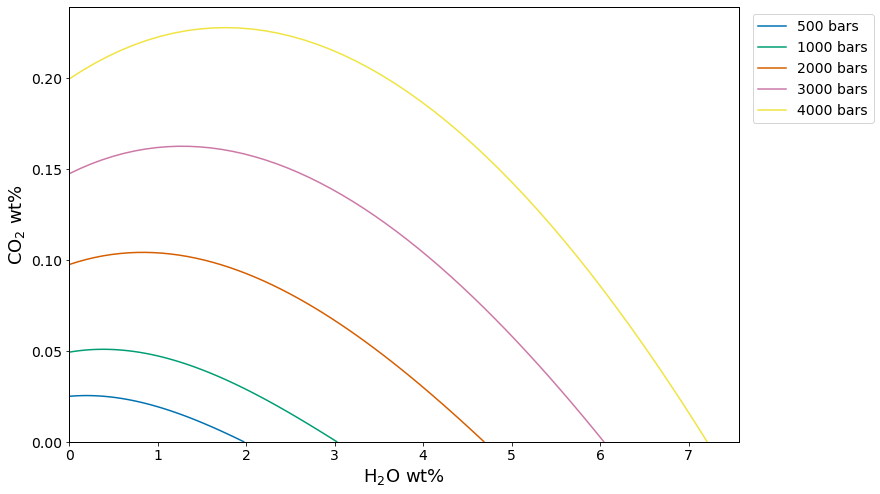

In [8]:
# Any particular isobar
sample_to_plot = "10*"

fig, ax = v.plot(isobars=isobar_dict[sample_to_plot]) 
v.show()